In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs
import random
import json
import time
from tabulate import tabulate

from kdtree import *
from helper import *

In [2]:
savefile = "mst_data2.json"
to_plot = False
stfin_plot = False
no_points = 10000
no_centres = 3

In [3]:

df = pd.read_csv('worldcitiespop.csv')
india_cities = df[df['Country'] == 'in']
print(india_cities.shape)
random_cities = india_cities.sample(n=no_points, random_state=42)

unique_cities = random_cities.drop_duplicates(subset=['Latitude', 'Longitude'])

points = list(zip(unique_cities['Latitude'], unique_cities['Longitude']))


print(len(points) , "points", points[:10])

/tmp/ipykernel_49519/1016761285.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('worldcitiespop.csv')


(39813, 7)
9591 points [(17.063333, 78.654444), (28.971111, 74.833889), (24.583333, 73.716667), (20.15, 75.533333), (23.55, 74.45), (17.25, 80.15), (21.766667, 72.15), (25.833333, 73.483333), (26.6475, 78.88555600000001), (29.881389, 77.238333)]


In [4]:
print(unique_cities.head())

        Country           City     AccentCity Region  Population   Latitude  \
1329234      in  chaudharpalli  Chaudharpalli    2.0         NaN  17.063333   
1341513      in      kisanpura      Kisanpura   24.0         NaN  28.971111   
1323154      in            arh            Arh   24.0         NaN  24.583333   
1360509      in    vadod khurd    Vadod Khurd   16.0         NaN  20.150000   
1324999      in       banswara       Banswara   24.0     93654.0  23.550000   

         Longitude  
1329234  78.654444  
1341513  74.833889  
1323154  73.716667  
1360509  75.533333  
1324999  74.450000  


In [5]:
no_points = len(points)
print(len(points) , points[:10])

9591 [(17.063333, 78.654444), (28.971111, 74.833889), (24.583333, 73.716667), (20.15, 75.533333), (23.55, 74.45), (17.25, 80.15), (21.766667, 72.15), (25.833333, 73.483333), (26.6475, 78.88555600000001), (29.881389, 77.238333)]


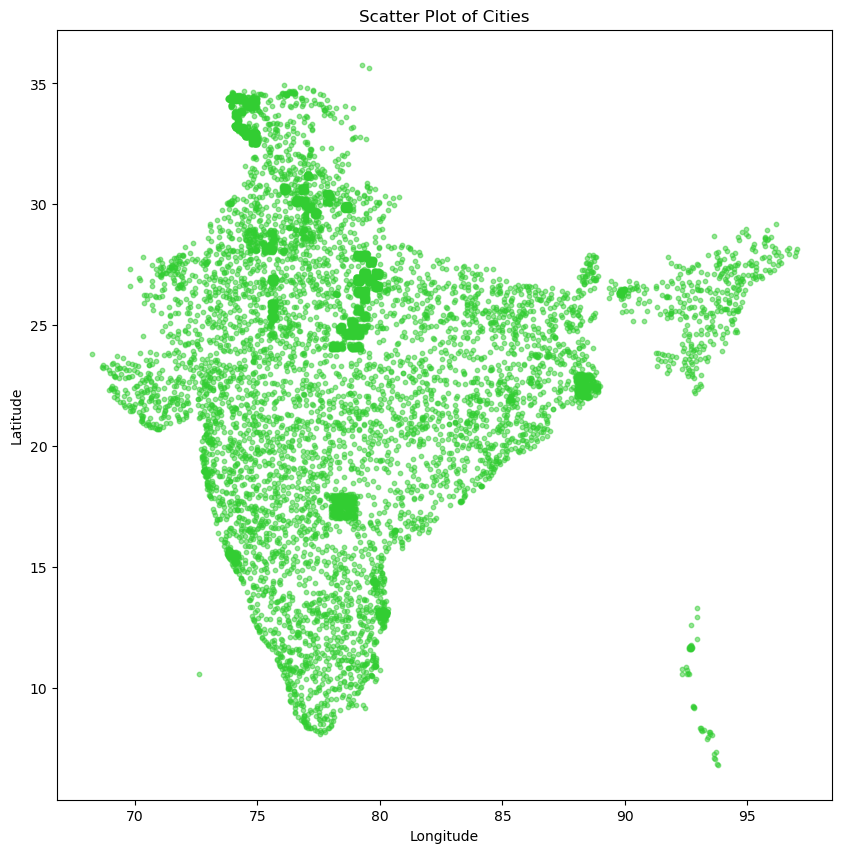

In [6]:
plt.figure(figsize=(10, 10))
plt.scatter(unique_cities['Longitude'], unique_cities['Latitude'], 
            alpha=0.5, s=10, c='limegreen')
plt.title('Scatter Plot of Cities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [7]:
cordmap = {point: i for i, point in enumerate(points)}
G = nx.Graph()
for coord, index in cordmap.items():
    G.add_node(index, pos=coord)
graphify(G, to_plot = stfin_plot  )


In [8]:
def dcran(cordmap):
    tree = KDTree()
    tree.root = tree.build(points)
    G = nx.Graph()
    for coord, index in cordmap.items():
        G.add_node(index, pos=coord)

    k = 2
    connected_components = 1
    while True:
        # graphify(G, to_plot)
        maxdis = min(len(cordmap) , k**k)
        for pointi, i in cordmap.items():
            pointj = ith_nearest_neighbor(tree, pointi, k)
            dis = euclidean_distance(pointi, pointj)
            G.add_edge(i, cordmap[pointj], weight=dis)
        graphify(G, to_plot)
            # print(k ,  i , cordmap[pointj] , dis )
            # randis = random.randint(k + 1, maxdis)
        for pointi, i in cordmap.items():
            randis = maxdis
            # randis = (cusrandis(k + 1 , maxdis))
            # print(randis , k)
            pointj = ith_nearest_neighbor(tree, pointi, randis)
            dis = euclidean_distance(pointi, pointj)
            G.add_edge(i, cordmap[pointj], weight=dis)
            # print(k ,  i , cordmap[pointj] , dis , randis)
        
        graphify(G, to_plot)
        ccount = count_clusters(G)
        print(k, ccount)
        k += 1
        
        if ccount == 1:
            break
        
    return G

In [9]:
dcran_start_time = time.time()
kc = dcran(cordmap)

2 105
3 3
4 1


In [10]:
graphify(kc, to_plot, bottom_text = f'after edge selection , no of edges = {kc.number_of_edges()}')

In [11]:
G = kc
num_nodes = G.number_of_nodes()
conedge = num_edges = G.number_of_edges()

# Calculate the sum of all edge weights
total_weight = sum(data["weight"] for u, v, data in G.edges(data=True))

print(f"Total number of nodes: {num_nodes}")
print(f"Total number of edges: {num_edges}")
print(f"Total sum of edge weights: {total_weight}")

Total number of nodes: 9591
Total number of edges: 37080
Total sum of edge weights: 20867.925789669407


In [12]:
mst = nx.minimum_spanning_tree(G, algorithm="prim", weight="weight")
graphify(mst, to_plot = stfin_plot )



In [13]:
G = mst
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()


foundw = total_weight = sum(data["weight"] for u, v, data in G.edges(data=True))

print(f"Total number of nodes: {num_nodes}")
print(f"Total number of edges: {num_edges}")
print(f"Total sum of edge weights: {total_weight}")
dcran_end_time = time.time()
dcran_elapsed_time = dcran_end_time - dcran_start_time

Total number of nodes: 9591
Total number of edges: 9590
Total sum of edge weights: 935.6176017642608


In [14]:
stmst_start_time = time.time()
G = nx.Graph()

for pointi, i in cordmap.items():
    G.add_node(i, pos=pointi)
    for pointj, j in cordmap.items():
        if i != j:
            dis = euclidean_distance(pointi, pointj)
            G.add_edge(i, j, weight=dis)

In [15]:
graphify(G, to_plot )

In [16]:
mst = nx.minimum_spanning_tree(G, algorithm="prim", weight="weight")
graphify(mst, to_plot = stfin_plot)

KeyboardInterrupt: 

: 

In [ ]:
G = mst
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Calculate the sum of all edge weights
realw = total_weight = sum(data["weight"] for u, v, data in G.edges(data=True))

print(f"Total number of nodes: {num_nodes}")
print(f"Total number of edges: {num_edges}")
print(f"Total sum of edge weights: {total_weight}")
stmst_end_time = time.time()
stmst_elapsed_time = stmst_end_time - stmst_start_time

Total number of nodes: 9591
Total number of edges: 9590
Total sum of edge weights: 914.3557313916614


In [ ]:
percentage_error = ((foundw - realw) / realw) * 100

# Format the output for readability
formatted_output = f"Real Weight: {realw}  Found Weight: {foundw}  no of Edge: {conedge} Percentage Error: {percentage_error:.2f}%"
formatted_output

'Real Weight: 914.3557313916614  Found Weight: 935.6176017642608  no of Edge: 37080 Percentage Error: 2.33%'

In [ ]:
with open(savefile, "r") as f:
    loaded_data = json.load(f)
print(loaded_data)
currres = []
speedup = round((stmst_elapsed_time  / dcran_elapsed_time) , 2)
loaded_data.append(
    [
        no_points,
        no_centres,
        foundw,
        realw,
        conedge,
        100 - percentage_error ,
        dcran_elapsed_time ,
        stmst_elapsed_time ,
        speedup
    ]
)

# Save the updated dictionary back to the JSON file
with open(savefile, "w") as f:
    json.dump(loaded_data, f)

[[1000, 10, 262.4419314705513, 258.819134723451, 8252, 98.6, 1.83, 4.38, 2.4], [10000, 10, 866.0209239473647, 865.3329904388614, 90645, 99.921, 28.58, 551.35, 19.29], [10000, 100, 1342.6324139702915, 1337.4478711909765, 27591, 99.612, 3.24, 510.53, 157.39], [10000, 100, 1342.6324139702915, 1337.4478711909762, 27591, 99.612, 2.48, 632.89, 255.22], [10000, 1000, 1459.7289235192638, 1455.1233116849917, 27457, 99.683, 2.5, 565.44, 226.17], [10000, 10, 866.0209239473647, 865.3329904388614, 90645, 99.92050071867081, 24.179672241210938, 617.7955191135406, 25.55], [10000, 50, 1260.1226131964793, 1255.8337705131123, 27661, 99.65848643474409, 2.1823902130126953, 513.3643357753754, 235.23], [10000, 10, 866.0209239473647, 865.3329904388614, 90645, 99.92050071867081, 24.11609435081482, 543.8352909088135, 22.55], [10000, 10, 875.7172119877604, 865.3329904388614, 38587, 98.79997392175785, 16.157432556152344, 646.0387144088745, 39.98], [10000, 100, 1342.6324139702872, 1337.4478711909717, 27591, 99.612

In [ ]:
with open(savefile, "r") as f:
    loaded_data = json.load(f)
print(loaded_data)

[[1000, 10, 262.4419314705513, 258.819134723451, 8252, 98.6, 1.83, 4.38, 2.4], [10000, 10, 866.0209239473647, 865.3329904388614, 90645, 99.921, 28.58, 551.35, 19.29], [10000, 100, 1342.6324139702915, 1337.4478711909765, 27591, 99.612, 3.24, 510.53, 157.39], [10000, 100, 1342.6324139702915, 1337.4478711909762, 27591, 99.612, 2.48, 632.89, 255.22], [10000, 1000, 1459.7289235192638, 1455.1233116849917, 27457, 99.683, 2.5, 565.44, 226.17], [10000, 10, 866.0209239473647, 865.3329904388614, 90645, 99.92050071867081, 24.179672241210938, 617.7955191135406, 25.55], [10000, 50, 1260.1226131964793, 1255.8337705131123, 27661, 99.65848643474409, 2.1823902130126953, 513.3643357753754, 235.23], [10000, 10, 866.0209239473647, 865.3329904388614, 90645, 99.92050071867081, 24.11609435081482, 543.8352909088135, 22.55], [10000, 10, 875.7172119877604, 865.3329904388614, 38587, 98.79997392175785, 16.157432556152344, 646.0387144088745, 39.98], [10000, 100, 1342.6324139702872, 1337.4478711909717, 27591, 99.612

In [ ]:
headers = [
    "Points",
    "Centres",
    "DCRAN Wt",
    "prims Wt",
    "Edge count",
    "Acc(%)",
    "DCRAN Time (s)",
    "STMST Time (s)",
    "Speedup"
]

# Format the data as a table using tabulate
table_str = tabulate(loaded_data[-15:], headers, tablefmt="pipe", floatfmt=(".0f", ".0f", ".1f", ".1f", ".0f", ".2f", ".2f", ".2f", ".2f"))
print(table_str)




|   Points |   Centres |   DCRAN Wt |   prims Wt |   Edge count |   Acc(%) |   DCRAN Time (s) |   STMST Time (s) |   Speedup |
|---------:|----------:|-----------:|-----------:|-------------:|---------:|-----------------:|-----------------:|----------:|
|      100 |        10 |       97.4 |       92.6 |          367 |    94.75 |             1.00 |             0.12 |      0.12 |
|      100 |        10 |       97.4 |       92.6 |          367 |    94.75 |             0.96 |             0.12 |      0.13 |
|      100 |        10 |       97.4 |       92.6 |          367 |    94.75 |             1.31 |             0.34 |      0.26 |
|       15 |        10 |       54.8 |       46.3 |           40 |    81.64 |             1.02 |             0.13 |      0.13 |
|      150 |         2 |       18.3 |       17.6 |          326 |    95.80 |            80.27 |             2.42 |      0.03 |
|      150 |         2 |       17.6 |       17.6 |          326 |   100.00 |            16.68 |            10.9

In [ ]:
print("Line 1\nLine 2")


Line 1
Line 2
